In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [36]:
#  dataset loading
data = pd.read_csv(r"C:\Users\SURUJ_KALITA\Desktop\blstm\KolkataCovidcsv.csv")
data

,From Date,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
0,01-01-2019 00:00,394.25,152.37,2.76,62.99,0.42,277.44,27.10,1014.83,0.0,NaN
1,01-01-2019 01:00,378.42,113.75,7.05,63.95,0.12,160.12,25.62,1014.62,0.0,NaN
2,01-01-2019 02:00,327.53,80.52,17.08,63.71,0.05,140.24,25.60,1014.45,0.0,NaN
3,01-01-2019 03:00,269.73,70.08,22.70,64.50,0.10,93.69,26.36,1014.38,0.0,NaN
4,01-01-2019 04:00,261.55,71.10,18.08,68.11,0.11,165.27,27.16,1014.53,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
35059,31-12-2022 19:00,152.97,0.56,20.55,67.77,0.26,181.56,7.84,1012.32,0.0,19.91
35060,31-12-2022 20:00,161.85,0.24,19.60,70.19,0.38,168.70,7.69,1012.82,0.0,19.47
35061,31-12-2022 21:00,159.56,0.63,15.35,72.02,0.51,279.40,7.70,1013.48,0.0,19.10
35062,31-12-2022 22:00,168.30,9.49,10.30,75.61,0.52,283.48,7.45,1013.53,0.0,18.64


# Importing Dataset

In [27]:
file = 'DelhiCovidcsv.csv'
df = pd.read_csv(file, parse_dates = ['From Date'], index_col = 'From Date')
df

,PM2.5,NO2,Ozone,RH,WS,WD,SR,BP,RF,AT
From Date,,,,,,,,,,
01-01-2019 00:00,655.50,49.08,92.30,79.22,0.30,226.00,3.57,990.10,NaN,4.65
01-01-2019 01:00,583.50,52.18,62.35,79.70,0.30,197.25,3.62,990.05,NaN,4.58
01-01-2019 02:00,435.75,55.25,60.20,78.10,0.30,202.00,3.57,989.95,NaN,4.72
01-01-2019 03:00,351.50,51.48,52.07,77.48,0.30,197.75,3.65,989.98,NaN,4.43
01-01-2019 04:00,319.75,46.30,49.42,77.98,0.30,230.50,3.87,990.12,NaN,4.02
...,...,...,...,...,...,...,...,...,...,...
31-12-2022 19:00,131.50,58.82,8.65,81.25,0.52,165.50,5.65,976.60,NaN,17.02
31-12-2022 20:00,129.25,55.02,7.15,84.28,0.30,169.00,5.72,976.60,NaN,15.78
31-12-2022 21:00,148.00,53.05,6.08,87.43,0.30,168.25,5.75,976.62,NaN,14.70


# Data Pre Processing

In [28]:
df = data.drop(columns=['NO2' , 'Ozone' , 'RH' , 'WS' , 'WD' , 'SR' , 'BP' , 'RF' , 'AT'])

In [29]:
df

,From Date,PM2.5
0,01-01-2019 00:00,394.25
1,01-01-2019 01:00,378.42
2,01-01-2019 02:00,327.53
3,01-01-2019 03:00,269.73
4,01-01-2019 04:00,261.55
...,...,...
35059,31-12-2022 19:00,152.97
35060,31-12-2022 20:00,161.85
35061,31-12-2022 21:00,159.56
35062,31-12-2022 22:00,168.30


In [30]:

# Assuming df is already defined and loaded
df = df.loc[:, ['From Date', 'PM2.5']]

# Total number of missing values
print('Total num of missing values:', df['PM2.5'].isnull().sum())
print('')

# Locate the missing value
df_missing_date = df.loc[df['PM2.5'].isnull()]
print('The date of missing value:')
print(df_missing_date.loc[:, ['From Date']])

# Replace missing value with interpolation
df['PM2.5'].interpolate(inplace=True)

# Drop the 'From Date' column
df = df.drop('From Date', axis=1)

# Optionally, print df to see the changes
print(df)


Total num of missing values: 4083

The date of missing value:
              From Date
771    02-02-2019 03:00
1726   13-03-2019 22:00
2122   30-03-2019 10:00
2339   08-04-2019 11:00
2344   08-04-2019 16:00
...                 ...
34957  27-12-2022 13:00
34958  27-12-2022 14:00
35003  29-12-2022 11:00
35004  29-12-2022 12:00
35005  29-12-2022 13:00

[4083 rows x 1 columns]
        PM2.5
0      394.25
1      378.42
2      327.53
3      269.73
4      261.55
...       ...
35059  152.97
35060  161.85
35061  159.56
35062  168.30
35063  180.10

[35064 rows x 1 columns]


In [31]:
# Split train data and test data
train_size = int(len(df)*0.8)

# train_data = df.PM2.5.loc[:train_size] -----> it gives a series
# Do not forget use iloc to select a number of rows
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [32]:
# Scale data
# The input to scaler.fit -> array-like, sparse matrix, dataframe of shape (n_samples, n_features)
scaler = MinMaxScaler().fit(train_data)

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [33]:
# Create input dataset
# Th input shape should be [samples, time steps, features]
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
    
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
        
    return np.array(Xs), np.array(ys)

X_train, y_train = create_dataset(train_scaled,30)
X_test, y_test = create_dataset(test_scaled,30)

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (28021, 30, 1)
y_train.shape:  (28021, 1)
X_test.shape:  (6983, 30, 1)
y_test.shape:  (6983, 1)


In [34]:
X_test[:33].shape

(33, 30, 1)

In [35]:
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer 
    model.add(GRU (units = units, return_sequences = True, 
                 input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units))                 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
   
    return model
model_gru = create_gru(64)

# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(LSTM(units = units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model

model_bilstm = create_bilstm(64)

def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,
                    batch_size = 16, shuffle = False, callbacks = [early_stop])
    return history

history_gru = fit_model(model_gru)
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
1401/1401 [==============================] - 33s 21ms/step - loss: 0.0015 - val_loss: 9.5016e-04
Epoch 2/100
1401/1401 [==============================] - 29s 20ms/step - loss: 7.3322e-04 - val_loss: 0.0011
Epoch 3/100
1401/1401 [==============================] - 29s 21ms/step - loss: 6.7844e-04 - val_loss: 0.0011
Epoch 4/100
1401/1401 [==============================] - 33s 23ms/step - loss: 6.4071e-04 - val_loss: 0.0010
Epoch 5/100
1401/1401 [==============================] - 30s 21ms/step - loss: 6.4930e-04 - val_loss: 0.0010
Epoch 6/100
1401/1401 [==============================] - 38s 27ms/step - loss: 6.6602e-04 - val_loss: 9.3057e-04
Epoch 7/100
1401/1401 [==============================] - 35s 25ms/step - loss: 6.2487e-04 - val_loss: 8.5470e-04
Epoch 8/100
1401/1401 [==============================] - 40s 28ms/step - loss: 6.3013e-04 - val_loss: 9.3665e-04
Epoch 9/100
1401/1401 [==============================] - 30s 21ms/step - loss: 6.0940e-04 - val_loss: 9.2386e-04
Epo

1401/1401 [==============================] - 24s 17ms/step - loss: 4.5444e-04 - val_loss: 7.3737e-04
Epoch 14/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.5280e-04 - val_loss: 7.2127e-04
Epoch 15/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.5189e-04 - val_loss: 7.0629e-04
Epoch 16/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.5156e-04 - val_loss: 6.9384e-04
Epoch 17/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.5069e-04 - val_loss: 6.8295e-04
Epoch 18/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.4996e-04 - val_loss: 6.7302e-04
Epoch 19/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.4876e-04 - val_loss: 6.6338e-04
Epoch 20/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.4577e-04 - val_loss: 6.5656e-04
Epoch 21/100
1401/1401 [==============================] - 24s 17ms/step - loss: 4.4322e-04 - val_loss

In [37]:
output_size = 10
model = model_bilstm
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(output_size))  # Output layer with 'output_size' neurons for multi-step ahead prediction
model.compile(optimizer='adam', loss='mse')

In [38]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
876/876 [==============================] - 24s 22ms/step - loss: 0.0011 - val_loss: 1.4161e-04
Epoch 2/100
876/876 [==============================] - 17s 20ms/step - loss: 5.1015e-04 - val_loss: 1.2667e-04
Epoch 3/100
876/876 [==============================] - 17s 20ms/step - loss: 4.6528e-04 - val_loss: 9.8823e-05
Epoch 4/100
876/876 [==============================] - 18s 21ms/step - loss: 4.3608e-04 - val_loss: 1.1530e-04
Epoch 5/100
876/876 [==============================] - 18s 21ms/step - loss: 4.2063e-04 - val_loss: 1.4409e-04
Epoch 6/100
876/876 [==============================] - 18s 20ms/step - loss: 4.2121e-04 - val_loss: 1.2219e-04
Epoch 7/100
876/876 [==============================] - 18s 21ms/step - loss: 4.1610e-04 - val_loss: 1.7393e-04
Epoch 8/100
876/876 [==============================] - 18s 20ms/step - loss: 4.0814e-04 - val_loss: 1.0394e-04
Epoch 9/100
876/876 [==============================] - 18s 20ms/step - loss: 4.1329e-04 - val_loss: 8.8558e-05
Epoch

876/876 [==============================] - 18s 20ms/step - loss: 3.0740e-04 - val_loss: 8.4744e-05
Epoch 75/100
876/876 [==============================] - 18s 20ms/step - loss: 3.0670e-04 - val_loss: 8.1962e-05
Epoch 76/100
876/876 [==============================] - 18s 21ms/step - loss: 3.0349e-04 - val_loss: 8.2320e-05
Epoch 77/100
876/876 [==============================] - 18s 21ms/step - loss: 2.9795e-04 - val_loss: 8.9955e-05
Epoch 78/100
876/876 [==============================] - 18s 21ms/step - loss: 3.0246e-04 - val_loss: 8.3199e-05
Epoch 79/100
876/876 [==============================] - 18s 21ms/step - loss: 2.9956e-04 - val_loss: 1.1432e-04
Epoch 80/100
876/876 [==============================] - 18s 21ms/step - loss: 2.9817e-04 - val_loss: 8.5090e-05
Epoch 81/100
876/876 [==============================] - 18s 21ms/step - loss: 2.9818e-04 - val_loss: 1.0901e-04
Epoch 82/100
876/876 [==============================] - 18s 21ms/step - loss: 3.0028e-04 - val_loss: 8.2879e-05
Epoch

In [39]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

219/219 [==============================] - 1s 6ms/step - loss: 8.4071e-05
Test Loss: 8.407066343352199e-05
219/219 [==============================] - 2s 6ms/step


In [56]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# Ensure predictions have the same shape as y_test
# If y_pred has multiple outputs, select the first one (or the appropriate one)
if predictions.ndim > 1:
    predictions = predictions[:, 2]  # Adjust the index as needed

# Calculate Fraction of predictions with a factor of 2 (FAC2)
def fac2(y_true, y_pred):
    within_factor = (y_true / y_pred <= 2) & (y_pred / y_true <= 2)
    return np.mean(within_factor)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

# Calculate Correlation Coefficient (r)
r = np.corrcoef(np.ravel(y_test), np.ravel(predictions))[0, 1]

# Calculate Mean Gross Error (MGE)
mge = np.mean(np.abs(y_test - predictions))

# Calculate Mean Bias (MB)
mb = np.mean(y_test - predictions)

# Calculate Coefficient of Efficiency (COE)
coe = 1 - (np.sum((y_test - predictions) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Calculate Coefficient of Determination (R2 score)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f'Fraction of predictions with a factor of 2 (FAC2): {fac2(y_test, predictions)}')
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'Correlation Coefficient (r): {r}')
print(f'Mean Gross Error (MGE): {mge}')
print(f'Mean Bias (MB): {mb}')
print(f'Coefficient of Efficiency (COE): {coe}')
print(f'Coefficient of Determination (R2 score): {r2}')


Fraction of predictions with a factor of 2 (FAC2): 2.7705836368756193e-05
Root Mean Square Error (RMSE): 65.59049706075578
Correlation Coefficient (r): 0.9859266186628645
Mean Gross Error (MGE): 50.76633403121342
Mean Bias (MB): 50.766333660017466
Coefficient of Efficiency (COE): -17388.527693378826
Coefficient of Determination (R2 score): -1.4876744368246282


In [41]:
model_bilstm = model 

# Model Performance

219/219 [==============================] - 1s 6ms/step
GRU:
Mean Absolute Error: 6.2852
Root Mean Square Error: 10.2704

Bidirectiona LSTM:
Mean Absolute Error: 3.9464
Root Mean Square Error: 6.9845



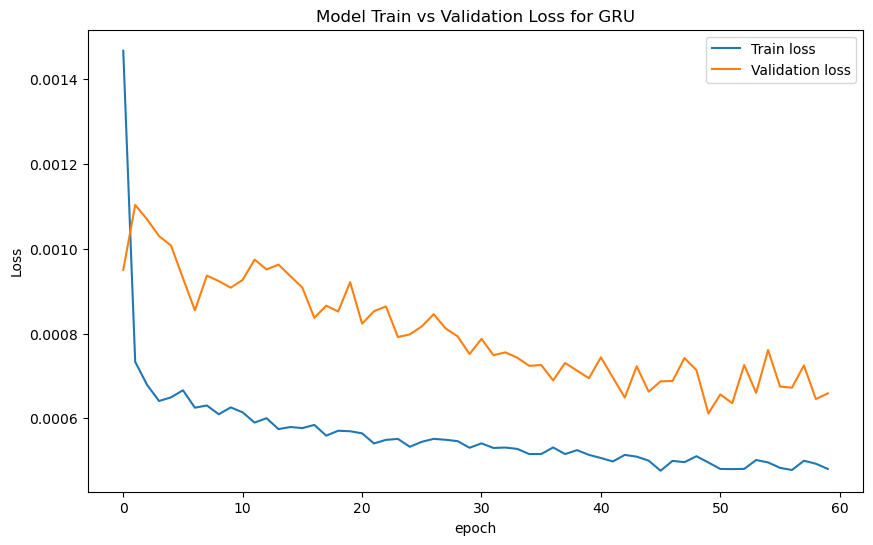

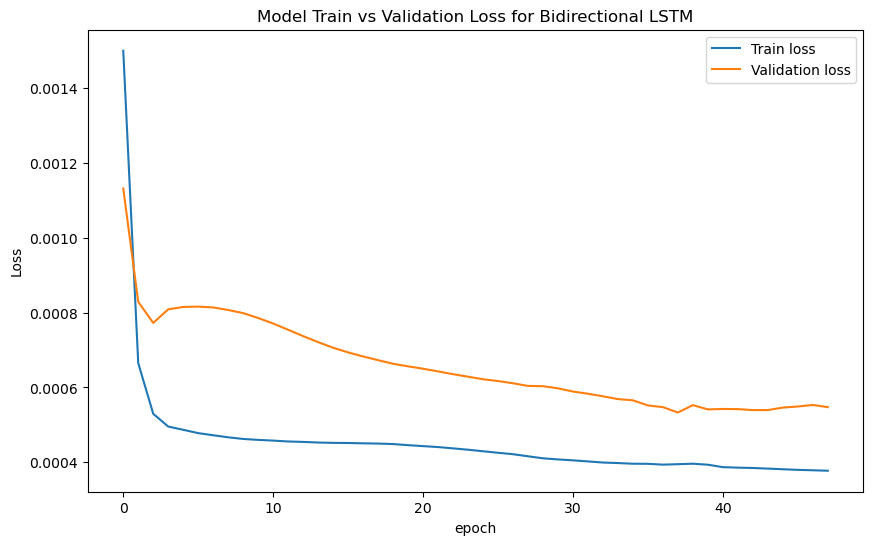

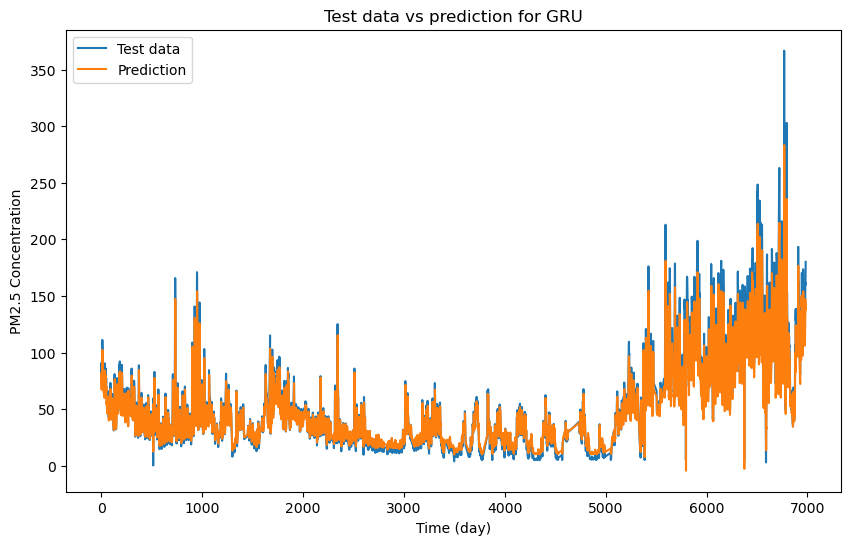

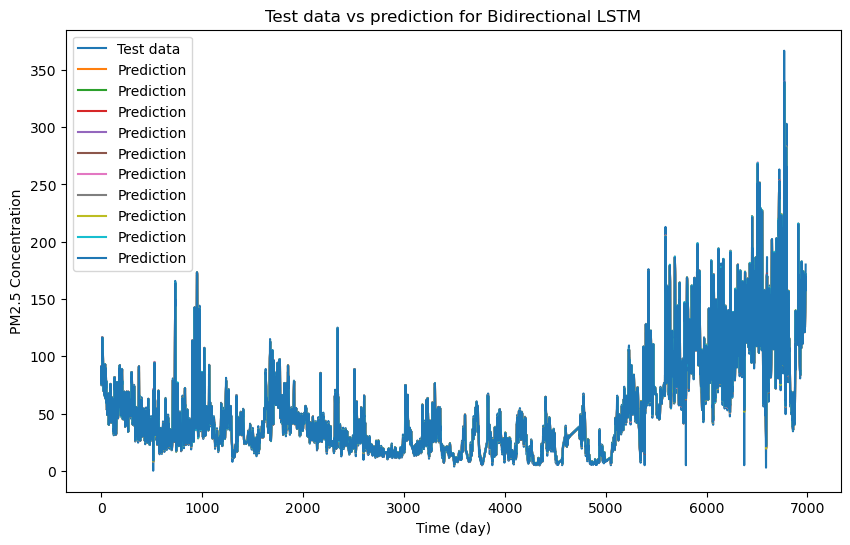

In [42]:
# Plot train loss and validation loss
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    plt.savefig(r"C:\Users\SURUJ_KALITA\Desktop\blstm'+model_name+.jpg", format='jpg', dpi=1000)

plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

# Transform data back to original data space
y_test = scaler.inverse_transform(y_test)
y_train = scaler.inverse_transform(y_train)

# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction

prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)

# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction)

    plt.plot(np.arange(range_future), np.array(y_test), label='Test data')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (day)')
    plt.ylabel('PM2.5 Concentration')
       
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

# Calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()

    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')

evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectiona LSTM')

In [43]:
# Select 60 days of data from test data
new_data = test_data.iloc[100:160]
# Scale the input
scaled_data = scaler.transform(new_data)
# Reshape the input 
def create_dataset (X, look_back = 1):
    Xs = []
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        
    return np.array(Xs)

X_30= create_dataset(scaled_data,30)
print('X_30.shape: ', X_30.shape) 

X_30.shape:  (30, 30, 1)


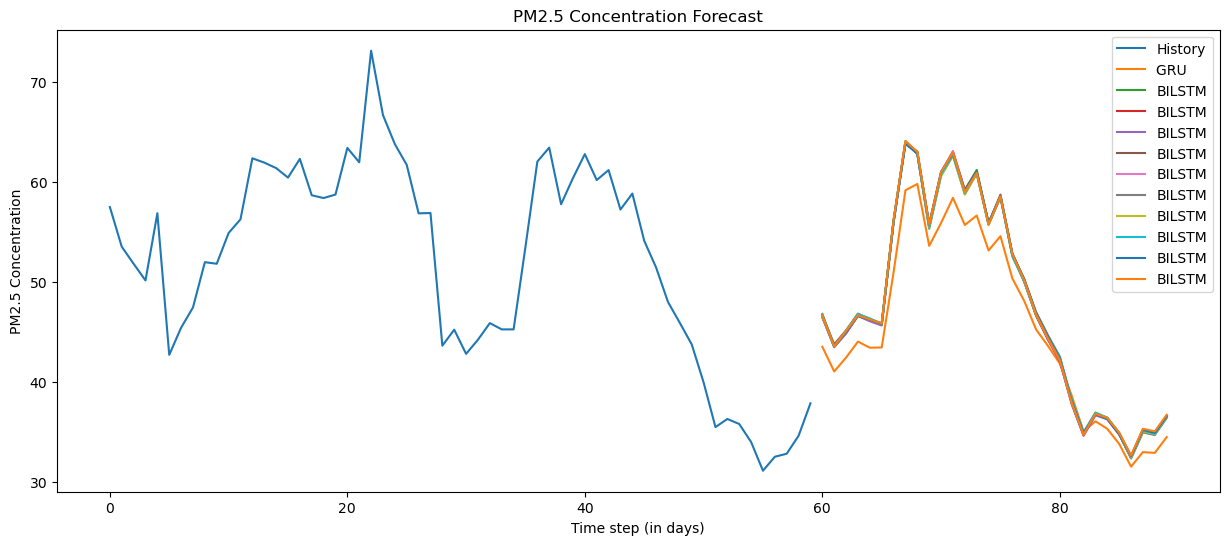

In [81]:
# # Make prediction for new data
# def prediction(model):
#     prediction = model.predict(X_30)
#     prediction = scaler.inverse_transform(prediction)
#     return prediction

# prediction_gru = prediction(model_gru)
# prediction_bilstm = prediction(model_bilstm)

# # Plot history and future
# def plot_multi_step(history, prediction1, prediction2):
    
#     plt.figure(figsize=(15, 6))
    
#     range_history = len(history)
#     range_future = list(range(range_history, range_history + len(prediction1)))

#     plt.plot(np.arange(range_history), np.array(history), label='History')
#     plt.plot(range_future, np.array(prediction1),label='Forecasted with GRU')
#     plt.plot(range_future, np.array(prediction2),label='Forecasted with BiLSTM')
    
#     plt.legend(loc='upper right')
#     plt.xlabel('Time step (in days)')
#     plt.ylabel('PM2.5 CONCENTRATION ')
   
    
# plot_multi_step(new_data, prediction_gru, prediction_bilstm)



import matplotlib.pyplot as plt
import numpy as np

def plot_multi_step(history, prediction1, prediction2):
    plt.figure(figsize=(15, 6))
    
    range_history = len(history)
    range_future_gru = np.arange(range_history, range_history + len(prediction1))
    range_future_bilstm = np.arange(range_history, range_history + len(prediction2))

    plt.plot(np.arange(range_history), np.array(history), label='History')
    plt.plot(range_future_gru, np.array(prediction1), label='GRU ')
    plt.plot(range_future_bilstm, np.array(prediction2), label='BILSTM')
    
#     # Plot GRU predictions with label only once and change color to green
#     if 'gru' not in plt.gca().get_legend_handles_labels()[1]:
#         plt.plot(range_future_gru, np.array(prediction1), label='Forecasted with GRU', color='green')

    
    plt.legend(loc='upper right')
    plt.xlabel('Time step (in days)')
    plt.ylabel('PM2.5 Concentration')
    plt.title('PM2.5 Concentration Forecast')
    
    plt.show()

# Assuming new_data is a list or array of historical PM2.5 concentrations
plot_multi_step(new_data, prediction_gru, prediction_bilstm)







In [61]:
print("BiLSTM Predictions:")
print(prediction_bilstm)


BiLSTM Predictions:
[[46.553253 46.459126 46.49452  46.67049  46.561604 46.545635 46.544945
  46.803112 46.695026 46.678226]
 [43.50051  43.54881  43.463295 43.757835 43.552258 43.52515  43.57282
  43.564857 43.571022 43.53534 ]
 [44.90861  44.989532 44.831783 45.152737 44.944824 45.029926 45.112415
  45.12795  44.96757  45.094387]
 [46.716064 46.634827 46.589638 46.82562  46.64616  46.769493 46.775932
  46.797005 46.59605  46.65604 ]
 [46.25053  46.140175 46.064423 46.255375 46.20257  46.23536  46.310257
  46.346012 46.219074 46.247925]
 [45.729332 45.70585  45.64365  45.824577 45.797024 45.76321  45.808796
  45.838802 45.824295 45.85363 ]
 [55.972206 56.074966 55.934532 56.148144 56.06265  56.1668   56.128872
  56.096355 56.048523 56.195587]
 [63.937656 64.083466 63.942078 64.06551  64.03071  64.074036 64.06442
  63.98622  63.821224 64.082466]
 [63.0511   62.996624 62.86574  62.838707 62.992928 62.79902  62.9038
  62.89388  62.85526  63.0252  ]
 [55.7697   55.65178  55.57234  55.4747